In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('bestsellers with categories.csv')
print(df.shape)
df.head()


(550, 7)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [4]:
zero_values_count = (df == 0).sum()
zero_values_count

name            0
author          0
user_rating     0
reviews         0
price          12
year            0
genre           0
dtype: int64

In [5]:
#Є ціни які = 0 тому ми їх видалимо як непідходящі дані
df = df.drop(df[df['price'] == 0].index)
zero_values_count = (df == 0).sum()
zero_values_count

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [7]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(f'{max_price} {min_price} {mean_price} {median_price}')

105 1 13.392193308550185 11.0


In [8]:
df['user_rating'].max()

4.9

In [9]:
 df[df['user_rating'] == 4.9].shape[0]

51

In [10]:

df.loc[df['reviews'].idxmax()]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [11]:
top_50_2015_df = df[(df['year'] == 2015)]
index_most_expensive = top_50_2015_df['price'].idxmax()
top_50_2015_df.loc[index_most_expensive]

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

In [12]:
fiction_top_50_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
fiction_top_50_2010.shape[0]

19

In [13]:
years_to_filter = [2010, 2011]
books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin(years_to_filter))]
books_with_rating_4_9

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [14]:
books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
books_with_rating_4_9

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [15]:
filtered_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)]

# Відсортування за зростанням ціни
filtered_books_2015.sort_values(by='price').tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [16]:
grouped_genre_prices = df[['genre', 'price']].groupby('genre')
grouped_genre_prices.head()

,genre,price
0,Non Fiction,8
1,Fiction,22
2,Non Fiction,15
3,Fiction,6
4,Non Fiction,12
5,Fiction,11
6,Fiction,30
7,Fiction,15
8,Non Fiction,3
11,Non Fiction,2


In [17]:
min_max_prices = grouped_genre_prices.agg({'price': ['min', 'max']})
min_max_prices

price     
              min  max
genre                 
Fiction         2   82
Non Fiction     1  105

In [18]:
grouped_author_books_count = df[['author', 'name']].groupby('author').agg({'name': 'count'})
grouped_author_books_count.columns = ['book_count']
grouped_author_books_count

,book_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [19]:
author_with_most_books = grouped_author_books_count.idxmax()
grouped_author_books_count.loc[author_with_most_books, 'book_count']

author
Gary Chapman    11
Name: book_count, dtype: int64

In [20]:
grouped_author_avg_rating = df[['author', 'user_rating']].groupby('author').agg({'user_rating': 'mean'})
grouped_author_avg_rating.columns = ['avg_rating']
print(grouped_author_avg_rating.head())
author_with_min_avg_rating = grouped_author_avg_rating['avg_rating'].idxmin()
grouped_author_avg_rating.loc[author_with_min_avg_rating]


                            avg_rating
author                                
Abraham Verghese                   4.6
Adam Gasiewski                     4.4
Adam Mansbach                      4.8
Adir Levy                          4.8
Admiral William H. McRaven         4.7


avg_rating    3.9
Name: Donna Tartt, dtype: float64

In [21]:
merged_df = pd.concat([grouped_author_books_count, grouped_author_avg_rating], axis=1)
merged_df = merged_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
print(merged_df.head())
print(merged_df.head(1))

                   book_count  avg_rating
author                                   
Muriel Barbery              1         4.0
Chris Cleave                1         4.1
Ian K. Smith M.D.           1         4.1
Pierre Dukan                1         4.1
Elizabeth Strout            1         4.2
                book_count  avg_rating
author                                
Muriel Barbery           1         4.0


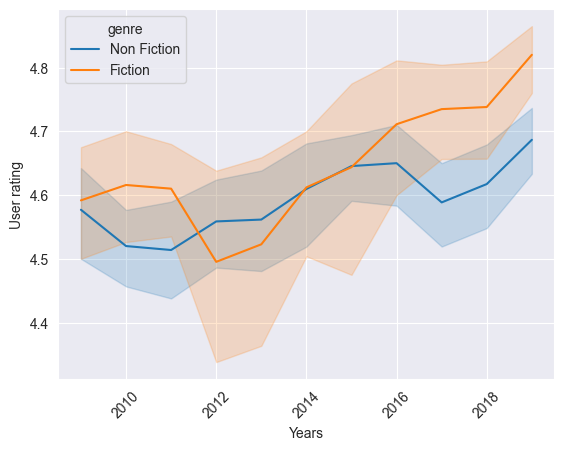

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.lineplot(x='year', y='user_rating', hue="genre", data=df)
plt.xlabel('Years')
plt.ylabel('User rating')
plt.xticks(rotation=45)
plt.show()

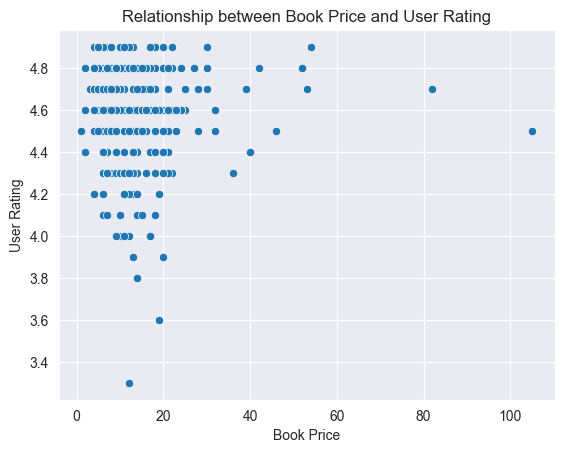

In [47]:
sns.scatterplot(x='price', y='user_rating', data=df)

# Set labels and title
plt.xlabel('Book Price')
plt.ylabel('User Rating')
plt.title('Relationship between Book Price and User Rating')

# Show the plot
plt.show()

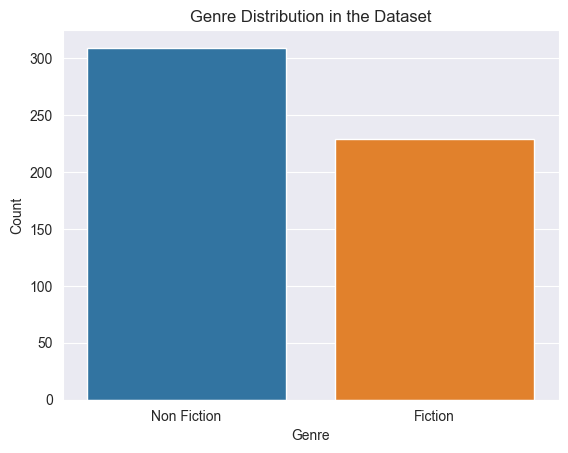

In [51]:
sns.countplot(x='genre', data=df, hue='genre')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution in the Dataset')

# Show the plot
plt.show()